In [1]:
import pandas as pd
from sklearn. preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from math import sqrt
import warnings
import sys
import math

warnings.filterwarnings('ignore')

sys.path.append("..")

In [2]:
data1 = pd.read_csv(f'../data/csgo_taskv2.csv')
data2 = pd.read_csv(f'../data/trip_duration_taskv2.csv')

Dataset №1

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        122410 non-null  int64  
 1   time_left         122410 non-null  float64
 2   ct_score          122410 non-null  int64  
 3   t_score           122410 non-null  int64  
 4   map               122410 non-null  object 
 5   bomb_planted      122410 non-null  bool   
 6   ct_health         122410 non-null  int64  
 7   t_health          122410 non-null  int64  
 8   ct_armor          122410 non-null  int64  
 9   t_armor           122410 non-null  int64  
 10  ct_money          122410 non-null  int64  
 11  t_money           122410 non-null  int64  
 12  ct_helmets        122410 non-null  int64  
 13  t_helmets         122410 non-null  int64  
 14  ct_defuse_kits    122410 non-null  int64  
 15  ct_players_alive  122410 non-null  int64  
 16  t_players_alive   12

In [4]:
data1.isna().sum()

Unnamed: 0          0
time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [5]:
for unique in data1['bomb_planted'].unique():
    print(unique, data1['bomb_planted'].loc[data1['bomb_planted'] == unique].count())

False 108726
True 13684


In [6]:
data_major_true = data1[data1['bomb_planted'] == True]
data_major_false = data1[data1['bomb_planted'] == False]

data_major_false_undersampled = data_major_false.sample(len(data_major_true))
data1 = pd.concat([data_major_false_undersampled, data_major_true], axis = 0)

y_cs = data1['bomb_planted']
for unique in y_cs.unique():
    print(unique, y_cs.loc[y_cs == unique].count())

False 13684
True 13684


In [7]:
data1 = data1.drop(['map'], axis=1)
x_cs = data1.drop(['bomb_planted'], axis=1)
x_train_cs, x_test_cs, y_train_cs, y_test_cs = train_test_split(x_cs, y_cs, test_size=0.3)

Dataset №2

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         729322 non-null  int64  
 1   id                 729322 non-null  object 
 2   vendor_id          729322 non-null  int64  
 3   passenger_count    729322 non-null  int64  
 4   pickup_longitude   729322 non-null  float64
 5   pickup_latitude    727475 non-null  float64
 6   dropoff_longitude  729322 non-null  float64
 7   dropoff_latitude   729322 non-null  float64
 8   trip_duration      729322 non-null  int64  
 9   pickup_datetime    729322 non-null  object 
 10  dropoff_datetime   729322 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 61.2+ MB


In [9]:
data2.isna().sum()

Unnamed: 0              0
id                      0
vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude      1847
dropoff_longitude       0
dropoff_latitude        0
trip_duration           0
pickup_datetime         0
dropoff_datetime        0
dtype: int64

In [10]:
mean_r = -0.0008561123804995453
for i in range(len(data2['pickup_latitude'])):
    if math.isnan(data2['pickup_latitude'].loc[data2.index[i]]):
        data2['pickup_latitude'].loc[data2.index[i]] = data2['dropoff_latitude'].loc[data2.index[i]] + mean_r
data2.isna().sum()

Unnamed: 0           0
id                   0
vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
pickup_datetime      0
dropoff_datetime     0
dtype: int64

In [11]:
data2 = data2.drop(['id'], axis=1)
data2 = data2.drop(['pickup_datetime'], axis=1)
data2 = data2.drop(['dropoff_datetime'], axis=1)

In [12]:
y_tx = data2['trip_duration']
x_tx = data2.drop(['trip_duration'], axis=1)

In [13]:
x_train_tx, x_test_tx, y_train_tx, y_test_tx = train_test_split(x_tx, y_tx, test_size=0.3)

## DecisionTreeClassifier

In [14]:
param_grid = {
    "max_depth": range(1, 8),
    "min_samples_split": range(1, 6),
    "criterion": ['gini', 'entropy', 'log_loss']
}

gridseach = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
gridseach.fit(x_train_cs, y_train_cs)
gridseach.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [15]:
tree_cl = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 4)
tree_cl.fit(x_train_cs, y_train_cs)
y_pred_cs = tree_cl.predict(x_test_cs)

[Text(0.5456730769230769, 0.9285714285714286, 'x[1] <= 40.04\ngini = 0.5\nsamples = 19157\nvalue = [9565, 9592]'),
 Text(0.5264423076923077, 0.7857142857142857, 'x[6] <= 347.5\ngini = 0.168\nsamples = 10570\nvalue = [978, 9592]'),
 Text(0.30288461538461536, 0.6428571428571429, 'x[1] <= 34.795\ngini = 0.112\nsamples = 9412\nvalue = [560, 8852]'),
 Text(0.15384615384615385, 0.5, 'x[1] <= 15.01\ngini = 0.077\nsamples = 7696\nvalue = [309, 7387]'),
 Text(0.07692307692307693, 0.35714285714285715, 'x[1] <= 14.885\ngini = 0.135\nsamples = 2481\nvalue = [180, 2301]'),
 Text(0.038461538461538464, 0.21428571428571427, 'x[1] <= 14.725\ngini = 0.04\nsamples = 2324\nvalue = [48, 2276]'),
 Text(0.019230769230769232, 0.07142857142857142, 'gini = 0.035\nsamples = 2276\nvalue = [40, 2236]'),
 Text(0.057692307692307696, 0.07142857142857142, 'gini = 0.278\nsamples = 48\nvalue = [8, 40]'),
 Text(0.11538461538461539, 0.21428571428571427, 'x[1] <= 14.975\ngini = 0.268\nsamples = 157\nvalue = [132, 25]'),
 T

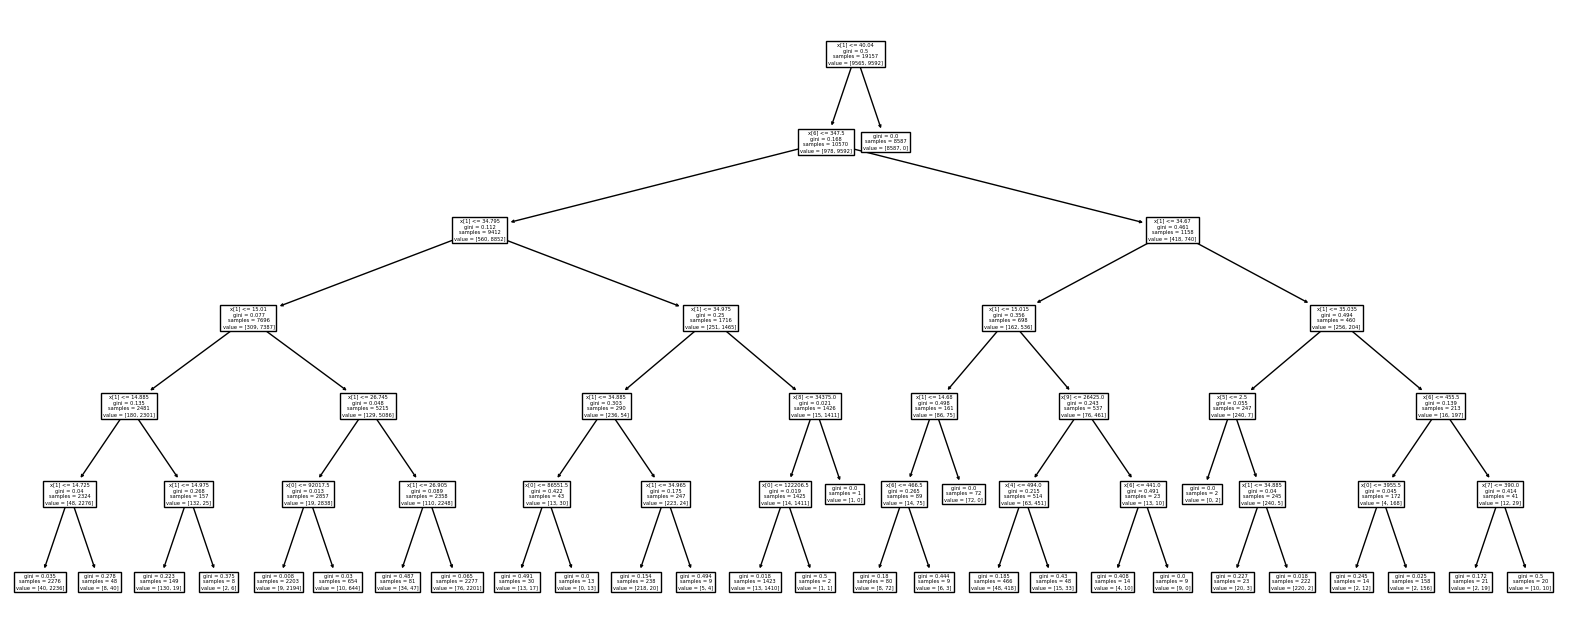

In [16]:
plt.figure(figsize=(20,8))

tree.plot_tree(tree_cl)

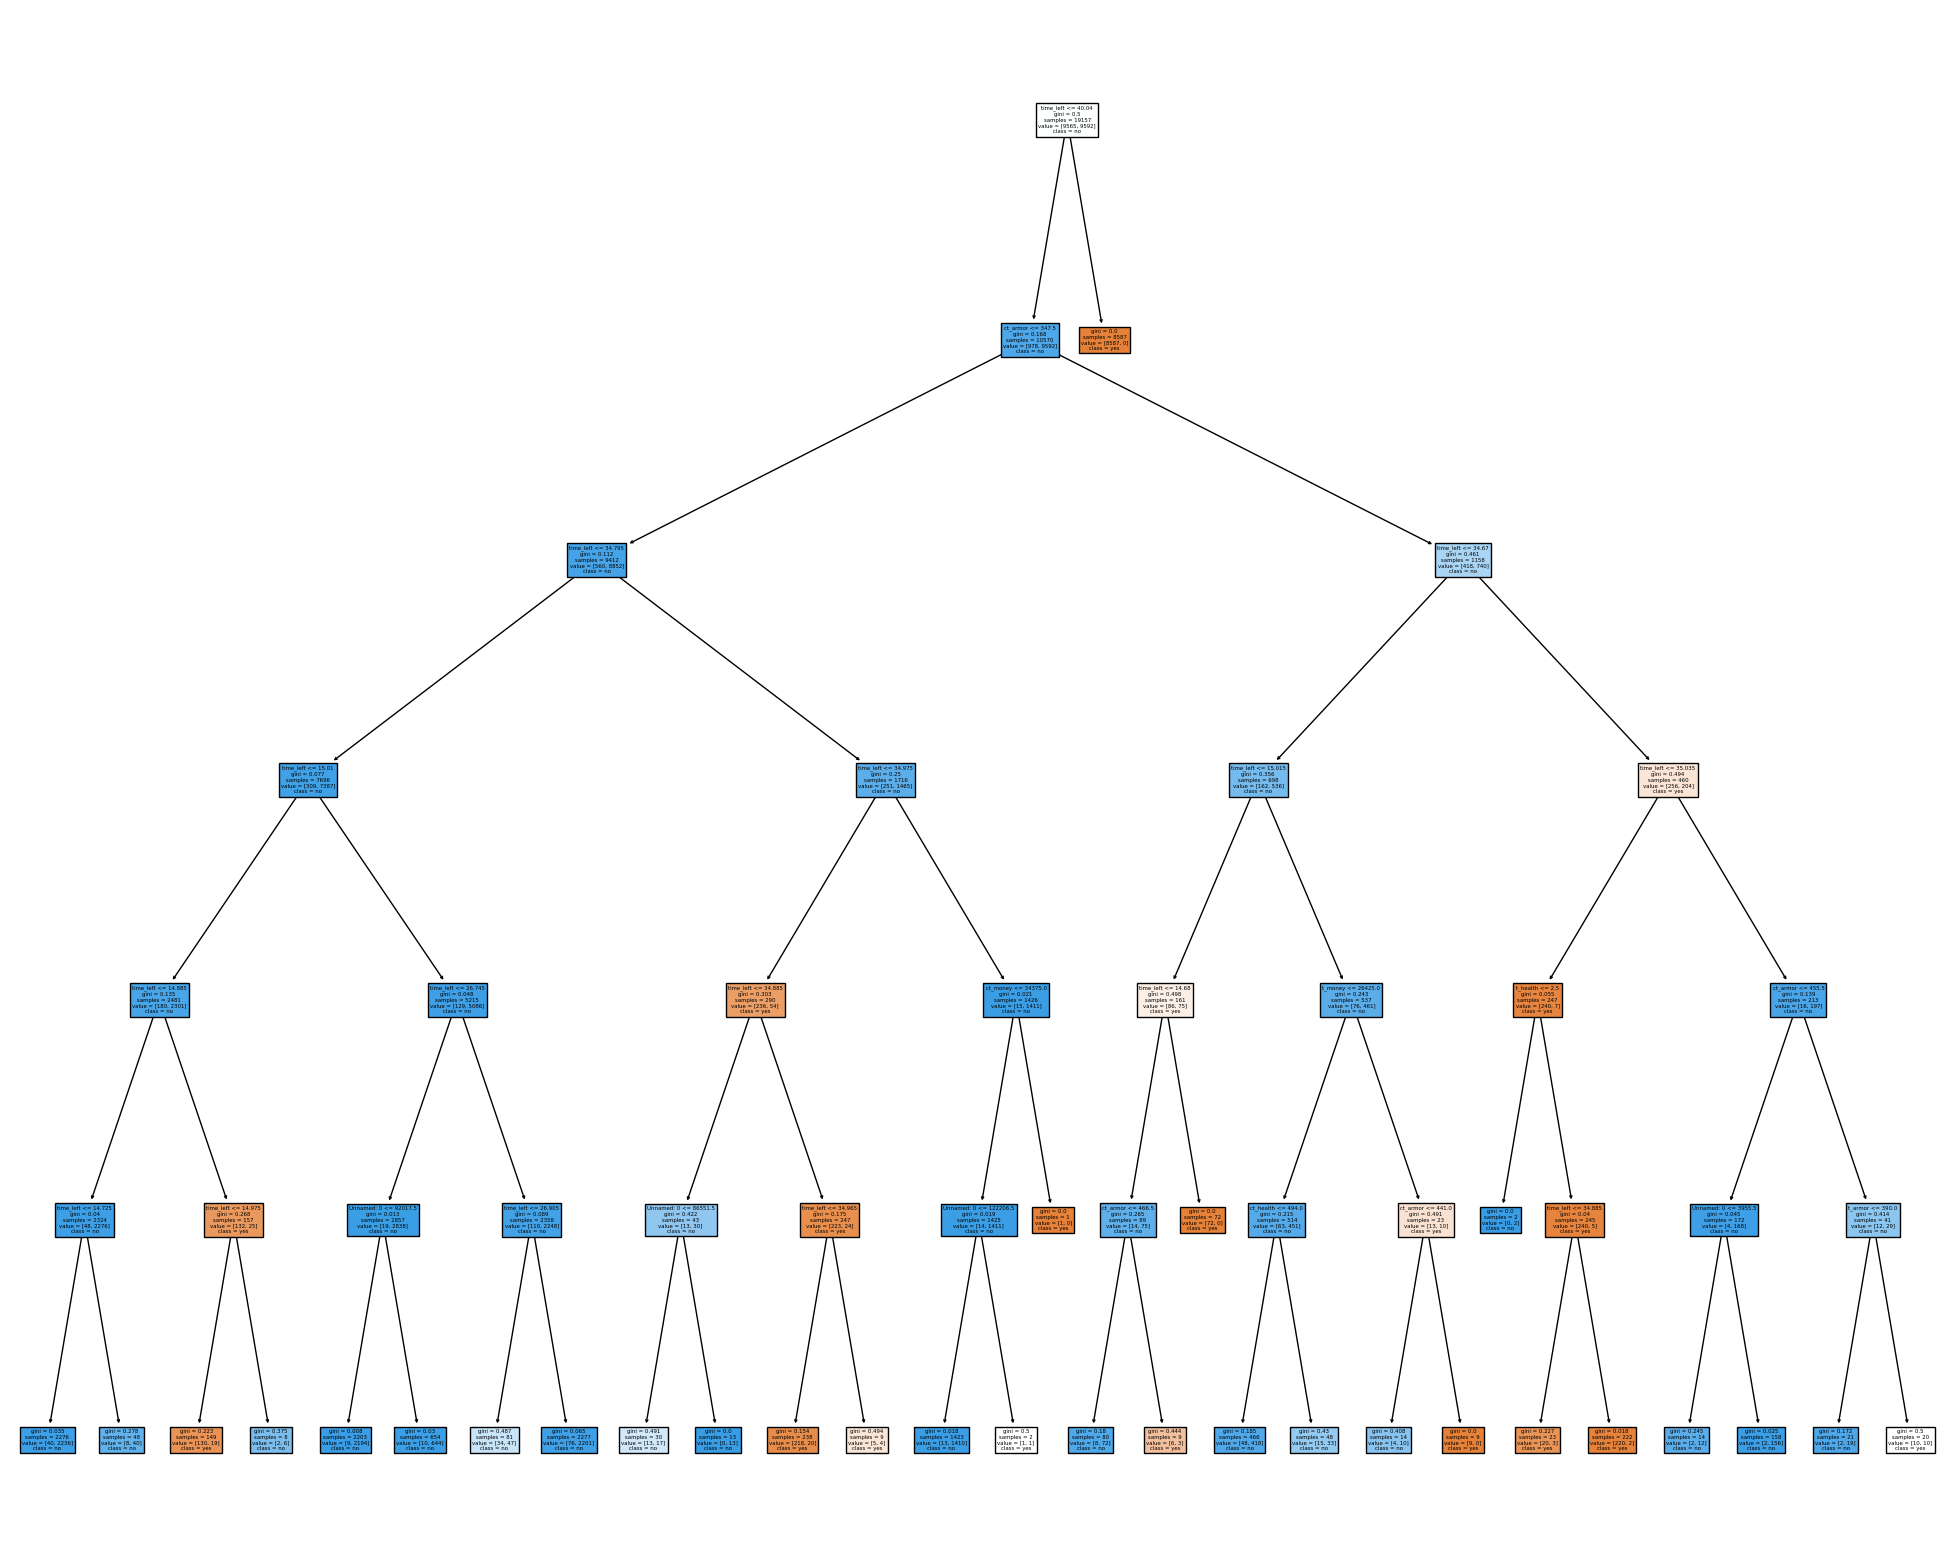

In [17]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_cl, feature_names = x_cs.columns.values.tolist (), class_names=["yes", "no"] , filled=True)

In [18]:
cm = confusion_matrix(y_test_cs, y_pred_cs)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3990  129]
 [  31 4061]]


In [19]:
print(classification_report(y_test_cs, y_pred_cs))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4119
        True       0.97      0.99      0.98      4092

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



## DecisionTreeRegression

In [20]:
'''param_grid = {
    "max_depth": range(2,8),
    "min_samples_split": range(2, 6),
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'puisson']
}

gridseach = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, scoring ='r2')
gridseach.fit(x_train_cs, y_train_cs)
gridseach.best_params_
{'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_split': 3}'''

'param_grid = {\n    "max_depth": range(2,8),\n    "min_samples_split": range(2, 6),\n    "criterion": [\'squared_error\', \'friedman_mse\', \'absolute_error\', \'puisson\']\n}\n\ngridseach = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, scoring =\'r2\')\ngridseach.fit(x_train_cs, y_train_cs)\ngridseach.best_params_\n{\'criterion\': \'friedman_mse\', \'max_depth\': 6, \'min_samples_split\': 3}'

In [21]:
tree_rg = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 6, min_samples_split = 3)
tree_rg.fit(x_train_tx, y_train_tx)
y_pred_tx = tree_rg.predict(x_test_tx)

In [22]:
print(tree.export_text(tree_rg))

|--- feature_3 <= -73.88
|   |--- feature_5 <= -73.89
|   |   |--- feature_6 <= 40.70
|   |   |   |--- feature_4 <= 40.73
|   |   |   |   |--- feature_4 <= 40.70
|   |   |   |   |   |--- feature_6 <= 40.70
|   |   |   |   |   |   |--- value: [787.02]
|   |   |   |   |   |--- feature_6 >  40.70
|   |   |   |   |   |   |--- value: [3949.28]
|   |   |   |   |--- feature_4 >  40.70
|   |   |   |   |   |--- feature_5 <= -74.12
|   |   |   |   |   |   |--- value: [2540.63]
|   |   |   |   |   |--- feature_5 >  -74.12
|   |   |   |   |   |   |--- value: [1253.75]
|   |   |   |--- feature_4 >  40.73
|   |   |   |   |--- feature_4 <= 40.73
|   |   |   |   |   |--- feature_3 <= -73.99
|   |   |   |   |   |   |--- value: [1782.00]
|   |   |   |   |   |--- feature_3 >  -73.99
|   |   |   |   |   |   |--- value: [85809.00]
|   |   |   |   |--- feature_4 >  40.73
|   |   |   |   |   |--- feature_5 <= -73.91
|   |   |   |   |   |   |--- value: [1943.34]
|   |   |   |   |   |--- feature_5 >  -73.91
| 

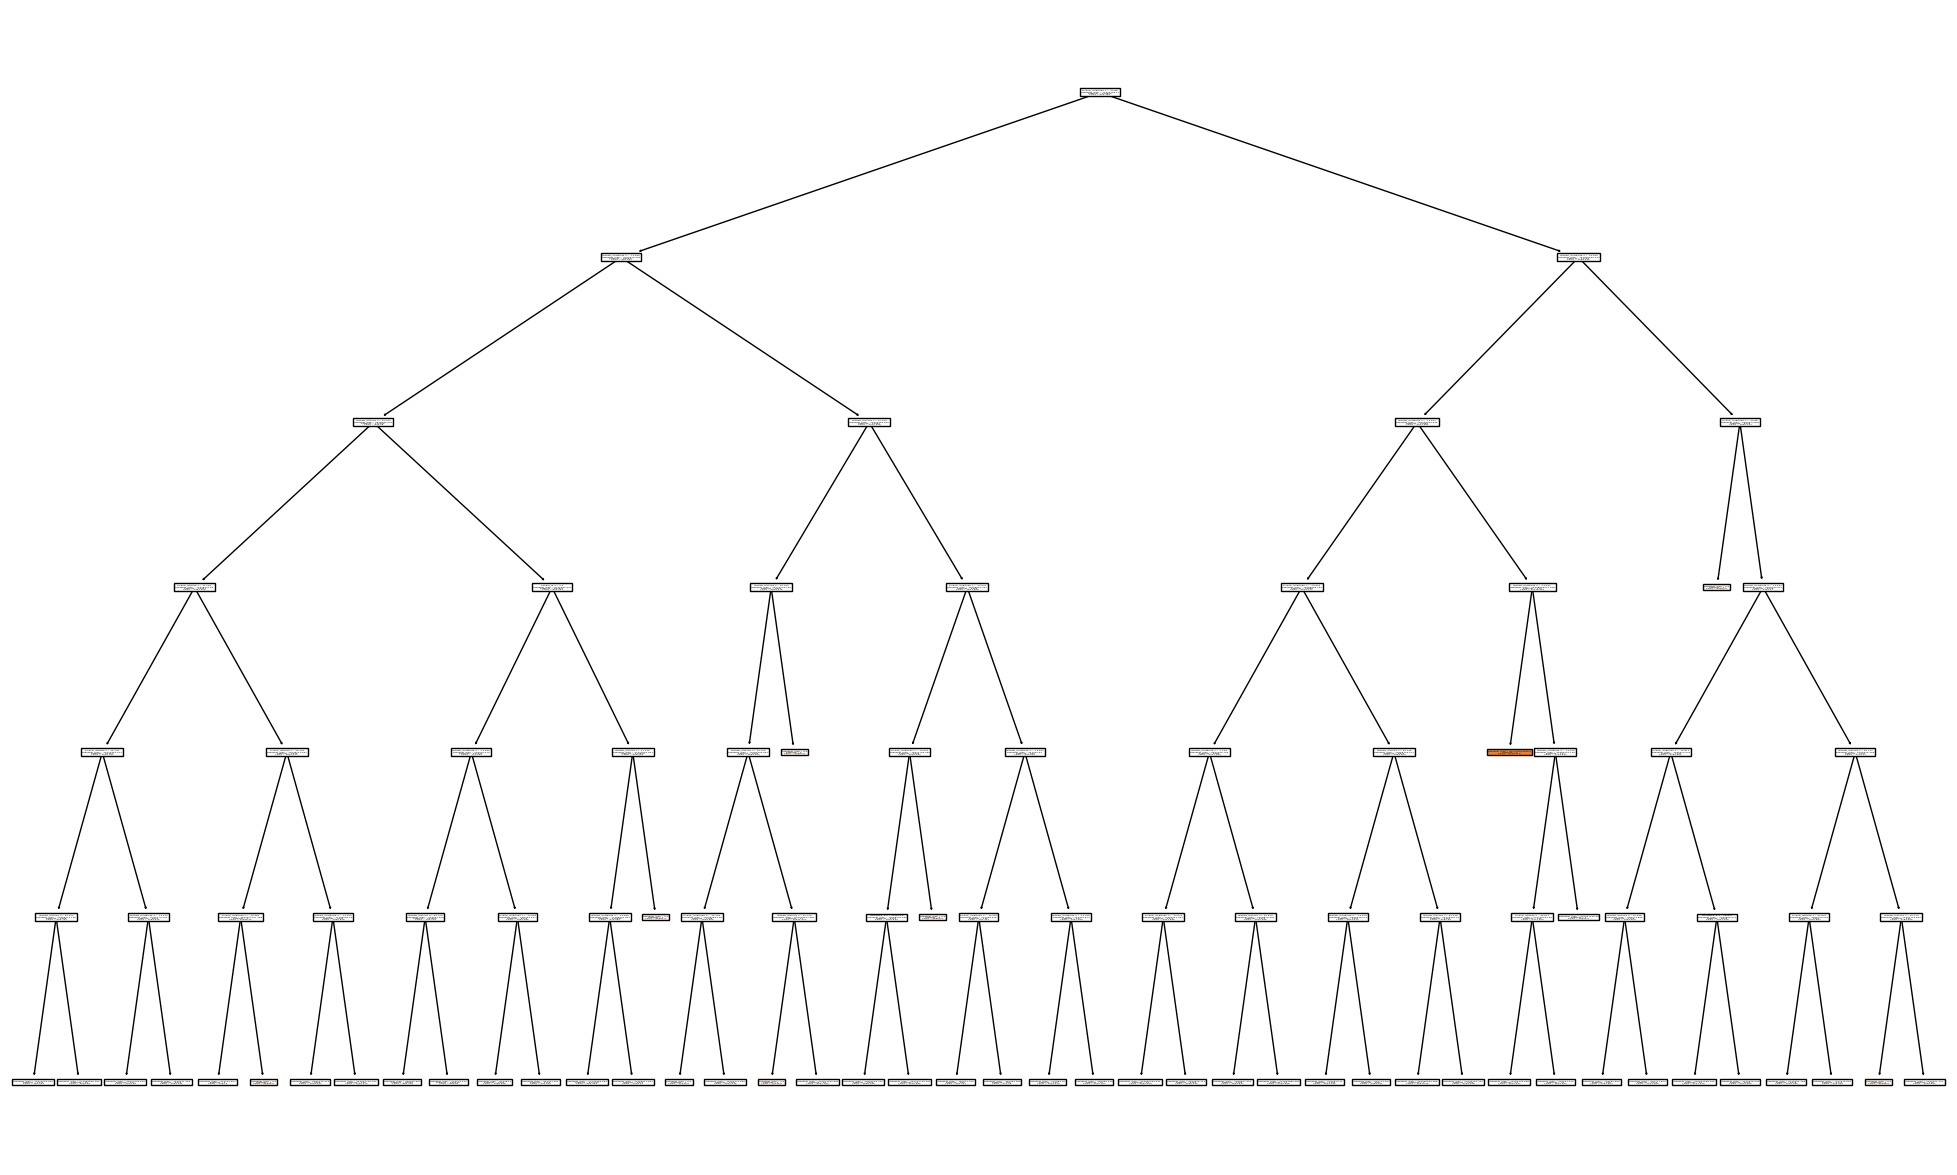

In [23]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(tree_rg, feature_names = x_tx.columns.values.tolist (), filled=True)

In [24]:
def Errors(y_test, y_predict):
    MAE = mean_absolute_error(y_test, y_predict)
    MSE = mean_squared_error(y_test, y_predict)
    RMSE = sqrt(mean_squared_error(y_test, y_predict))
    MAPE = sqrt(mean_absolute_percentage_error(y_test, y_predict))
    R2 = r2_score(y_test, y_predict)

    print('MAE: ', MAE,'MSE: ', MSE, 'RMSE: ', RMSE, 'MAPE: ', MAPE, 'R2: ', R2) 

In [25]:
Errors(y_test_tx, y_pred_tx)

MAE:  521.6175396396167 MSE:  9607145.582022041 RMSE:  3099.5395758115496 MAPE:  1.1537084854431559 R2:  0.013902422463178299


## Bagging

In [26]:
#Classifier
bagging_cl = BaggingClassifier().fit(x_train_cs, y_train_cs)
y_pred_cl = bagging_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cl))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4119
        True       0.97      0.99      0.98      4092

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [27]:
#Regressor
bagging_rg = BaggingRegressor().fit(x_train_tx, y_train_tx)
y_pred_rg_b = bagging_rg.predict(x_test_tx)

Errors(y_test_tx, y_pred_rg_b)

MAE:  494.3191040096526 MSE:  12563660.650894664 RMSE:  3544.525447911845 MAPE:  0.8702040021422343 R2:  -0.28956048673037516


## GradientBoosting

In [28]:
gradient_cl = GradientBoostingClassifier().fit(x_train_cs, y_train_cs)
y_pred_cl_gb = gradient_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cl_gb))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98      4119
        True       0.97      1.00      0.98      4092

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [29]:
gradient_rg = GradientBoostingRegressor().fit(x_train_tx, y_train_tx)
y_pred_rg_gb = gradient_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_rg_gb)

MAE:  469.9480372044459 MSE:  14261371.91376782 RMSE:  3776.4231640227795 MAPE:  1.0726826884837002 R2:  -0.46381713240970956


## Stacking

In [30]:
stacking_cl = StackingClassifier(estimators=[('en', DecisionTreeClassifier(criterion='entropy')),
                                        ('gini', DecisionTreeClassifier(criterion='gini'))],
                                        final_estimator=KNeighborsClassifier(10)).fit(x_train_cs, y_train_cs)

y_pred_cs_sk = stacking_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cs_sk))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4119
        True       0.97      0.99      0.98      4092

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [31]:
stacking_rg = StackingRegressor(estimators=[('en', DecisionTreeRegressor(max_depth=3)),
                                          ('lin_reg', LinearRegression())],
                               final_estimator=LinearRegression()).fit(x_train_tx, y_train_tx)

y_pred_tx_sk = stacking_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_tx_sk)

MAE:  534.2993597171705 MSE:  9623331.447521377 RMSE:  3102.149488261547 MAPE:  1.2072106388999078 R2:  0.012241071271717252


## CatBoost

In [32]:
catboost_rg = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE').fit(x_train_tx, y_train_tx)

0:	learn: 4125.4210042	total: 170ms	remaining: 170ms
1:	learn: 4121.2918428	total: 199ms	remaining: 0us


In [33]:
y_pred_cat_rg = catboost_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_cat_rg)

MAE:  525.0749884360397 MSE:  9563357.520943724 RMSE:  3092.467869023658 MAPE:  1.159573610962345 R2:  0.018396920915992876


In [34]:
catboost_cl = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True).fit(x_train_cs, y_train_cs)

0:	learn: 0.2331581	total: 2.42ms	remaining: 2.42ms
1:	learn: 0.1684212	total: 4.22ms	remaining: 0us


In [35]:
y_pred_cat = catboost_cl.predict(x_test_cs)
y_pred_cat = y_pred_cat.astype(bool)
print(classification_report(y_test_cs, y_pred_cat))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      4119
        True       0.50      1.00      0.67      4092

    accuracy                           0.50      8211
   macro avg       0.25      0.50      0.33      8211
weighted avg       0.25      0.50      0.33      8211



## XGBC

In [37]:
xgbc_cl = XGBClassifier().fit(x_train_cs, y_train_cs)
y_pred_xgbc_cl = xgbc_cl.predict(x_test_cs)
print(classification_report(y_test_cs, y_pred_xgbc_cl))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4119
        True       0.97      0.99      0.98      4092

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [38]:
xgbc_rg = XGBRegressor().fit(x_train_tx, y_train_tx)
y_pred_xgbc_rg = xgbc_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_xgbc_rg)

MAE:  444.65995090410104 MSE:  9907876.359804742 RMSE:  3147.677931397166 MAPE:  0.9179559526092477 R2:  -0.016965215476775874


## LGBM

In [39]:
# Regression
import re
x_train_tx = x_train_tx.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
lgbm_rg = LGBMRegressor().fit(x_train_tx, y_train_tx)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 510525, number of used features: 7
[LightGBM] [Info] Start training from score 953.446107


In [40]:
y_pred_lgbm_rg = lgbm_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_lgbm_rg)

MAE:  448.53273287307354 MSE:  9926032.483659426 RMSE:  3150.5606617964722 MAPE:  0.9925107622728864 R2:  -0.018828798119268964


In [41]:
# Class
x_train_cs = x_train_cs.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
lgbm_cl = LGBMClassifier().fit(x_train_cs, y_train_cs)

[LightGBM] [Info] Number of positive: 9592, number of negative: 9565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 19157, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500705 -> initscore=0.002819
[LightGBM] [Info] Start training from score 0.002819


In [42]:
y_pred_lgbm_cl = lgbm_cl.predict(x_test_cs)
print(classification_report(y_test_cs, y_pred_lgbm_cl))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4119
        True       0.97      0.99      0.98      4092

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211

